## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [135]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [136]:
df=pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [137]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [138]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [139]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [140]:
df[((df['group']=='treatment') == (df['landing_page']=='new_page'))==False].shape[0]

3893

f. Do any of the rows have missing values?

In [141]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [142]:
# Only include data that meet conditions in df2:
# group= treatment   and landing_page = new_page
#
df2= df[((df['group']=='treatment') == (df['landing_page']=='new_page'))]

In [143]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [144]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [145]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [146]:
df2.query('user_id==773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [147]:
#  Remove data with row at index position 1899 where user_id==773192
df2.drop([1899],inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [148]:
#Validate to confirm that there are no more duplication
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [149]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [150]:
df2.query("group =='control'")['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [151]:
df2.query("group =='treatment'")['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [152]:
#df2(df2['landing_page']=='new_page').sum()
df2.query("landing_page=='new_page'").shape[0]

145310

In [153]:
df2['landing_page'].shape[0]

290584

In [154]:
df2.query("landing_page=='new_page'").shape[0]/(df2['landing_page'].shape[0])

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**If the percentages are rounded for overall conversion, 'control group'(old_page) and 'treatment group'(new_page),all of them show 12%.  There is no distinct figure from any one of them.**

**Referring to results from parts (a) through (d), I think that there is insufficient evidence to conclude that the new treatment page leads to more conversions.**


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null and Alternative Hypotheses**
---
**$H_{0}$** :**$p_{new}$** -**$p_{old}$** **<= 0**


**$H_{1}$** :**$p_{new}$** -**$p_{old}$** **> 0**

 ### Steps to Analyze A/B Testing ###
 ---
 - Compute the observed difference between the metric: Actual conversion rates for the old and new pages.
 - Simulate the sampling distribution for the difference, p_diffs
 - Compute the p-value by finding the proportion of values in the sampling distribution that were greater than our observed difference.
 - Use this p-value to determine the statistical significance of observed difference.


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [155]:
p_new = df2['converted'].mean()
print('The convert rate for P𝑛𝑒𝑤 under the null is {}\n'.format(p_new))
print('Note: Assumption is that P𝑛𝑒𝑤 and P𝑜𝑙𝑑 are equal')

The convert rate for P𝑛𝑒𝑤 under the null is 0.11959708724499628

Note: Assumption is that P𝑛𝑒𝑤 and P𝑜𝑙𝑑 are equal


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [156]:
p_old = df2['converted'].mean()
print('The convert rate for P𝑜𝑙𝑑 under the null is {}\n'.format(p_old))
print('Note: Assumption is that P𝑛𝑒𝑤 and P𝑜𝑙𝑑 are equal')

The convert rate for P𝑜𝑙𝑑 under the null is 0.11959708724499628

Note: Assumption is that P𝑛𝑒𝑤 and P𝑜𝑙𝑑 are equal


c. What is $n_{new}$, the number of individuals in the treatment group?

In [157]:
n_new= df2.query("landing_page == 'new_page' ")['converted'].shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [158]:
n_old= df2.query("landing_page == 'old_page' ")['converted'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [159]:
new_page_converted=np.random.choice([0,1],size=n_new, p=[1-p_new,p_new])
new_page_converted.mean()

0.12006056018168054

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [160]:
old_page_converted=np.random.choice([0,1],size=n_old, p=[1-p_old,p_old])
old_page_converted.mean()

0.11862411718545644

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [161]:
obs_sim_diff= new_page_converted.mean() - old_page_converted.mean()
print('The observed simulated difference is: {}'.format(obs_sim_diff))

The observed simulated difference is: 0.0014364429962240993


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [162]:
import timeit # Used to time duration taken to create sampling distribution, p_diffs
start = timeit.default_timer()  # Start time

# Create sampling distribution, p_diffs for difference in 
#  converted rates of new page and old page, based on 10,000 simulated samples.
p_diffs = []
for _ in range(10000):
    #bootsamp = df2.sample(df2.shape[0], replace = True)
    new_page_converted = np.random.choice([0, 1], size=n_new, p=[1-p_new, p_new])
    old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-p_old, p_old])
    diff=new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)

stop = timeit.default_timer()   # Stop time
print('Duration taken to run 10,000 simulated samples is {} seconds'.format(round(stop - start)))


# Convert to numpy array
p_diffs = np.array(p_diffs)

Duration taken to run 10,000 simulated samples is 71 seconds


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [163]:
# Calculate observed difference in convert rate between both control and treatment groups
#  This is the observed difference between converted rates of new page and old page
control_convert = df2.query('group == "control"')['converted'].mean()
treatment_convert = df2.query('group == "treatment"')['converted'].mean()
obs_diff = treatment_convert - control_convert
print('The observed difference is: {}'.format(obs_diff))

The observed difference is: -0.0015782389853555567


In [164]:
# Build confidence interval at a confidence level of 95% using sampling distribution, p_diffs 
low, upper = np.percentile(p_diffs, 2.5), np.percentile(p_diffs, 97.5)
low, upper

(-0.0023765001430660162, 0.0023378498358589514)

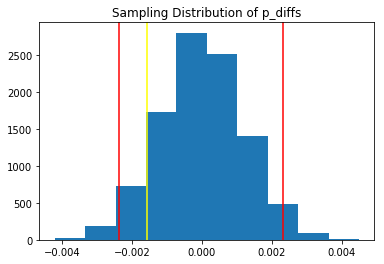

In [165]:
# Plot sampling distribution: p_diffs, and
#  show the observed difference and 95% confidence interval (CI)

plt.hist(p_diffs);
plt.axvline(x=obs_diff, color ='yellow')
plt.axvline(x=low, color='red');
plt.axvline(x=upper, color='red');
plt.title("Sampling Distribution of p_diffs");

**Yes, above plot reflects expected**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [166]:
p_val=(p_diffs > obs_diff).mean()
print('The proportion of p_diffs that are greater than the actual difference observed in ab_data.csv is {}'.format(p_val))

The proportion of p_diffs that are greater than the actual difference observed in ab_data.csv is 0.9032


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The computation in part j is called the p- value.**


In lesson 12: Hypothesis Testing, p-value is defined as the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

**Information** (Details that are known)
 - Type I error: Deciding the alternative (new page) is better, but really the null (old page) is better
 - Type II error: Deciding the null (old page) is better, but really the alternative (new page) is better.
 - Type I error threshold, α (alpha) is 0.05 
 - p-value is 0.90
 
**Conditions**
 - pval ≤ α ⇒ Reject Null Hypothesis ( H0 ) - Choose Alternative Hypothesis
 - pval > α ⇒ Fail to Reject Null Hypothesis ( H0 ) - Stay with the Null Hypothesis as our decision
 
**Result**
 - 0.90 > 0.05  (pval > α ⇒ Fail to Reject Null Hypothesis ( H0 ))

Since the p-value is higher than the type I error rate, there is no statistically significant evidence to suggest that the new page converts better. Based on the data, we fail to reject the Null Hypothesis. In other words, the new page does not have better conversion rates than the old page. It is best to retain the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [167]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

print('Conversion rate for old page: {}'.format(convert_old))
print('Conversion rate for new page: {}'.format(convert_new))
print('Number of rows for old page:  {}'.format(n_old))
print('Number of rows for new page:  {}'.format(n_new))

Conversion rate for old page: 17489
Conversion rate for new page: 17264
Number of rows for old page:  145274
Number of rows for new page:  145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [168]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], value=None, alternative='smaller', prop_var=False)
print('z-score is {} and p-value is {}'.format(z_score, p_value))

z-score is 1.3109241984234394 and p-value is 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

 - **The z-score is 1.3109 and falls within the -1.96 and 1.96 bracket, with a p-value larger than 0.05** 
 - **The Z-test result indicates that we fail to reject the Null Hypothesis**
 - **The p-value obtained from parts j and k are similar, 0.9051 and 0.9025 respectively**
 - **Results obtained from parts j and k compliment one another. The conversion rate of the new page is no better than the old page**

**Source: http://resources.esri.com/help/9.3/arcgisdesktop/com/gp_toolref/spatial_statistics_toolbox/what_is_a_z_score_what_is_a_p_value.htm**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression model because it is a regression approach used to predict only two possible outcomes**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [169]:
# Instead of using df2, a new df will be used for Part III
df3 = df2.copy()
df3.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [170]:
# Add intercept column
df3['intercept'] = 1

# Add ab_page column, that will display 1 if treatment and 0 if control
df3['ab_page'] = (df3.group == 'treatment').astype(int)
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [171]:
model = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [172]:
# Summary of model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 16 Jul 2019   Pseudo R-squ.:               8.077e-06
Time:                        03:15:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [173]:
# First step to interpret, exponentiate the explanatory variables
np.exp(-1.9888),np.exp(-0.0150)

(0.13685955841614492, 0.98511193960306265)

In [174]:
# Since the multiplicative changes returned are less than 1,  compute the reciprocal
#  This will change the direction from a unit increase to a unit decrease
1/np.exp(-0.0150)
print('For every 1 unit decrease in converted, ab_page is {} times as likely holding all else constant'.format(round(1/np.exp(-0.0150),3)))

For every 1 unit decrease in converted, ab_page is 1.015 times as likely holding all else constant


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?


**In regression, p-values are always given for testing if the parameter for the intercept or the slope are equal to zero and the null hypothesis.**

 
 - **The p-value for ab_page is 0.190. Since it is greater than 0.05, this suggests that there is no statistically significant relationship between the explanatory variable (ab_page) and the response variable (converted).**

 - **Why does the p-value differs in Part II and here in Part III:**
  - Part II is a **one-tailed test** (<=,>). Quoted from Oracle, "A one-tailed test allows you to determine if one mean is greater or less than another mean, but not both. A direction must be chosen prior to testing.In other words, a one-tailed test tells you the effect of a change in one direction and not the other."
  - Part III is a **two-tailed test** (=, !=). Quoted from Oracle, " A two-tailed test allows you to determine if two means are different from one another. A direction does not have to be specified prior to testing.In other words, a two-tailed test will taken into account the possibility of both a positive and a negative effect."
  - Source : https://blogs.oracle.com/marketingcloud/the-difference-between-one-tailed-two-tailed-testing
  
**Null and Alternative Hypotheses**
---
1. Here are the null and alternative hypotheses in **Part II**:
  - **$H_{0}$** :**$p_{new}$** -**$p_{old}$** **<= 0**
  - **$H_{1}$** :**$p_{new}$** -**$p_{old}$** **> 0**
  
1.  The null and alternative hypotheses in **Part III** (regression model):
  - **$H_{0}$** :**$p_{new}$** -**$p_{old}$**  **= 0**
  - **$H_{1}$** :**$p_{new}$** -**$p_{old}$** **!= 0**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

 - **Other things that might influence whether or not an individual converts could include:**
  - Technology factors such as page load time, UI design, accessibility (for people with disabilities)
  - Sociological factors like geography, occupation, education, age and gender.
 - **Considering other factors to add into the regression model is a good idea as this may provide a better insight on user patterns or behaviours.**
 
 - **The disadvantages to adding additional terms into regression model:**
  - Multicollinearity: X (predictor) variables are correlated with one another, and also the response variable.
  - Linearity: A linear relationship might not exist between the response and predictor variables. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [175]:
# Read data from countries.csv dataset 
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [176]:
# Merge datasets using user_id as a common denominator
df_countries = countries.set_index('user_id').join(df3.set_index('user_id'), how='inner')
df_countries.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [177]:
df_countries['country'].nunique(),df_countries['country'].unique()

(3, array(['UK', 'US', 'CA'], dtype=object))

In [178]:
# Create the necessary dummy variables, list new cols in alpha order
# Kept all 3 dummies in the df to check for accuracy, will drop from lm
df_countries['intercept'] = 1
df_countries[['CA', 'UK', 'US']] = pd.get_dummies(df_countries['country'])
df_countries.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [179]:
# Country = US will be made as baseline and dropped from df
logit_mod = sm.Logit(df_countries['converted'], df_countries[['intercept',  'UK', 'US']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 16 Jul 2019   Pseudo R-squ.:               1.521e-05
Time:                        03:15:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [180]:
#exponentiate the explanatory variables 
# compute the reciprocal for multiplicative changes that are less than 1 
#print('Canada: {}'.format(1/np.exp( -2.0375)))
print("Conversion rate is {} times as likely in the UK than Canada holding all else constant".format(round(np.exp(0.0507),2)))
print("Conversion rate is {} times as likely in the US than Canada holding all else constant".format(round(np.exp(0.0408),2)))

Conversion rate is 1.05 times as likely in the UK than Canada holding all else constant
Conversion rate is 1.04 times as likely in the US than Canada holding all else constant


**Does it appear that country had an impact on conversion?**
 - Based on the Logit Regression Results data, we fail to reject the Null Hypothesis. The p-values for both UK and US are greater than 0.05. It does not appear that country had an impact on conversion.


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [181]:
# Check for interaction between countries and
#  ab_page column( 1 when an individual receives the treatment and 0 if control)
df_countries['CA_page']= df_countries['CA'] * df_countries['ab_page']
df_countries['UK_page']= df_countries['UK'] * df_countries['ab_page']
df_countries['US_page']= df_countries['US'] * df_countries['ab_page']
df_countries.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,CA_page,UK_page,US_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1,0


In [182]:
# Create 
#  Drop CA and make it as the baseline
#log_mod = sm.Logit(df_countries['converted'], df_countries[['intercept', 'ab_page', 'UK', 'US', 'UK_page','US_page']])
log_mod = sm.Logit(df_countries['converted'], df_countries[['intercept', 'UK_page','US_page']])
result = log_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 16 Jul 2019   Pseudo R-squ.:               1.082e-05
Time:                        03:15:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.3164
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9926      0.008   -252.910      0.000      -2.008      -1.977
UK_page        0.0112      0.018      0.626      0.532      -0.024       0.046
US_page       -0.0144      0.012     -1.155      0.248      -0.039       0.010
==============================================================================
"""

In [183]:
# Exponentiate the explanatory variables 
#  compute the reciprocal for multiplicative changes that are less than 1 
print("Conversion rate is {} times as likely for new page and individuals in the UK than Canada holding all else constant".format(round(np.exp(0.0112),2)))
print("Conversion rate is {} times less likely for new page and individuals in the US than Canada holding all else constant".format(round(1/np.exp(-0.0144),2)))

Conversion rate is 1.01 times as likely for new page and individuals in the UK than Canada holding all else constant
Conversion rate is 1.01 times less likely for new page and individuals in the US than Canada holding all else constant


**Does it appear that interaction between page and country have significant effects on conversion?**
 - Based on the Logit Regression Results data, the p-values for both UK and US are greater than 0.05. It does not appear that the interaction between page and country have significant effects on conversion.


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [184]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0